In [1]:
import pandas as pd
import numpy as np
import nltk
from tqdm import tqdm
tqdm.pandas()
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import contractions
from contractions import contractions_dict
contractions.add("n't", "not")
contractions.add("nt", "not")
import string
punctuation_string = string.punctuation
import re
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner']) # Initialize spacy 'en' model, keeping only tagger component needed for lemmatization
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import time as t
import sklearn.metrics as sm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from jsondataset import files_in_directory
from pickle import dump
from pickle import load
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import time
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/cleaned_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54749 entries, 0 to 54748
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   review      54748 non-null  object
 1   polarity    54749 non-null  object
 2   nltk_texts  54749 non-null  object
dtypes: object(3)
memory usage: 1.3+ MB


In [4]:
df.dropna()

,review,polarity,nltk_texts
0,order op nail polish receive one please ...,pos,<Text: I ordered 2 of the OP! nail polish...>
1,love color opi product come timely manner ...,pos,<Text: Love this color and OPI. Product came i...
2,not like definitely not worth price s thick...,neg,<Text: because I didn't like this at all and...>
3,cool pen five star,pos,<Text: Cool pen Five Stars...>
4,immortan joe carry way valhalla tell shiny ...,neg,<Text: Immortan Joe carried me all the way to...>
...,...,...,...
54744,costume disappointing bc way big lbs ord...,neut,<Text: The costume was disappointing b/c it wa...
54745,pretty decent fun read end however feel ...,neut,"<Text: Pretty decent and fun read. The ending,..."
54746,still favorite color five star,pos,<Text: Still my favorite color! Five Stars...>
54747,help tractor run rough thank smooth run,pos,"<Text: Helped my tractor from running rough, t..."


In [5]:
df['review']

0        order   op   nail polish receive one   please ...
1        love color opi   product come timely manner   ...
2        not like definitely not worth price    s thick...
3                                       cool pen five star
4        immortan joe carry way valhalla tell    shiny ...
                               ...                        
54744    costume disappointing bc way big       lbs ord...
54745    pretty decent fun read   end   however   feel ...
54746                     still favorite color   five star
54747          help tractor run rough   thank   smooth run
54748    sad record bad   love metallica excite add vin...
Name: review, Length: 54749, dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54749 entries, 0 to 54748
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   review      54748 non-null  object
 1   polarity    54749 non-null  object
 2   nltk_texts  54749 non-null  object
dtypes: object(3)
memory usage: 1.3+ MB


In [7]:
y=df['polarity'].astype('str').array
X=df['review'].astype('str').array

In [8]:
X

<PandasArray>
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  'order   op   nail polish receive one   please ship one soon   thank order   op   nail polish',
                                                                                                                                                                                                                       

In [9]:
# create pipeline
start_time = time.time()
estimators = []
vectorizer = TfidfVectorizer(ngram_range=(1,1))
estimators.append(('vectorizer', vectorizer))
estimators.append(('KNN', KNeighborsClassifier(n_neighbors=3)))
model_KNN = Pipeline(estimators)


# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
#results = cross_val_score(model_LR, X, y, cv=kfold)
scoring = 'accuracy'
cv_results = cross_val_score(model_KNN, X, y, cv=kfold, scoring=scoring, error_score='raise')
model_KNN.fit(X, y)
predicted = cross_val_predict(model_KNN, X, y, cv=kfold)
predicted_prob = cross_val_predict(model_KNN, X, y, cv=kfold, method='predict_proba')

cv results  [0.68383562 0.70940639 0.68127854 0.67634703 0.68182648 0.68255708
 0.68365297 0.68968037 0.66977169 0.67720132]
 
classification report
              precision    recall  f1-score   support

         neg       0.57      0.81      0.67     18799
        neut       0.76      0.44      0.56     18481
         pos       0.82      0.80      0.81     17469

    accuracy                           0.68     54749
   macro avg       0.72      0.68      0.68     54749
weighted avg       0.71      0.68      0.68     54749

 
accuracy 0.6835558640340463
 
precision 0.71589231473468
 
f1 0.713072314614685
 
jaccard 0.5236128026720869
 
matthews corr 0.5418033411252747
 
cohen's kapp 0.5243890749803728
 
confusion matrix


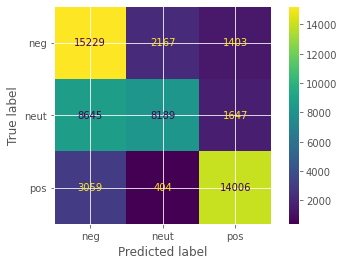

8.084556118647258


In [10]:
#results
print("cv results ", cv_results)
print(' ')
print("classification report")
print(sm.classification_report(y, predicted))
print(' ')
print("accuracy", sm.accuracy_score(y, predicted))
print(' ')
print("precision", sm.precision_score(y, predicted, average='macro'))
print(' ')
print("f1", sm.precision_score(y, predicted, average='weighted'))
print(' ')
print("jaccard", sm.jaccard_score(y, predicted, average='macro'))
print(' ')
print("matthews corr", sm.matthews_corrcoef(y, predicted))
print(' ')
print("cohen's kapp", sm.cohen_kappa_score(y, predicted))
print(' ')
print("confusion matrix")
cm = sm.confusion_matrix(y, predicted, labels=model_KNN.classes_)
disp = sm.ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_KNN.classes_)
disp.plot()
plt.show()
end_time=time.time()
print((end_time-start_time)/60)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

# Binarize the output
y = label_binarize(y, classes=['pos', 'neut', 'neg'])
n_classes = y.shape[1]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    model_KNN
)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

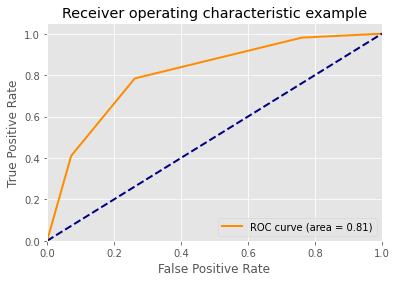

In [12]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

In [13]:
y_score
predicted = classifier.predict(X_test)
predicted

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0]])

In [14]:
df_prob = pd.DataFrame(y_score, columns=['prob_yes', 'prob_neut', 'prob_neg'])
df_pred = pd.DataFrame(predicted, columns=['pred_yes', 'pred_neut', 'pred_neg'])
df_prob['pred_yes'] = df_pred['pred_yes']
df_prob['pred_neut'] = df_pred['pred_neut']
df_prob['pred_neg'] = df_pred['pred_neg']


In [15]:
y_score

array([[0.33333333, 0.        , 0.66666667],
       [0.        , 0.66666667, 0.33333333],
       [1.        , 0.        , 0.        ],
       ...,
       [0.        , 0.        , 1.        ],
       [0.        , 0.66666667, 0.33333333],
       [0.66666667, 0.        , 0.33333333]])

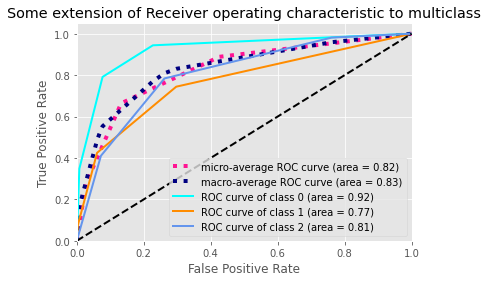

In [16]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [17]:
'''#Choose Multinomial NB as model ( to get app running, change later)
model_used = classifier.fit(X,y)

# save the model to disk
filename = 'finalized_onevsrest_model.sav'
dump(model_used, open(filename, 'wb'))'''

"#Choose Multinomial NB as model ( to get app running, change later)\nmodel_used = classifier.fit(X,y)\n\n# save the model to disk\nfilename = 'finalized_onevsrest_model.sav'\ndump(model_used, open(filename, 'wb'))"

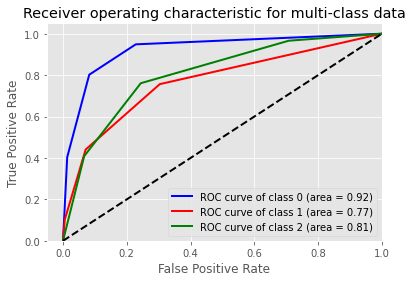

In [18]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA


clf = OneVsRestClassifier(model_KNN)
y_score = cross_val_predict(clf, X, y, cv=10 ,method='predict_proba')

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [19]:
vectorizer.get_feature_names_out()

array(['aa', 'aaa', 'aaaa', ..., 'zzzzz', 'zzzzzzzz',
       'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz'], dtype=object)